# Grands principes de l'apprentissage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
% matplotlib inline
np.set_printoptions(precision=2,linewidth=500,suppress=True)

## Sur-apprentissage

Nous utilisons le modèle linéaire en étendant l'input avec des sinus et cosinus
  de fréquences de plus en plus élevés.
  Quand on met trop de haute fréquence, on observe le sur-apprentissage

   avec freqMax=2 : sous-apprentissage
   avec freqMax=6 : bon-apprentissage
   avec freqMax=15 : sur-apprentissage

In [9]:
class LinearModel:
    
    def fit(self, X, Y):
        """ X.T X^(-1) """
        XTX_1 = np.linalg.pinv(X.T @ X) #pinv=pseudo-inverse (au cas où X n'est pas inversible)
        """l'estimateur des poids w"""
        self.hat_w = XTX_1 @ X.T @ Y

    def predict(self,X):
        return X @ self.hat_w


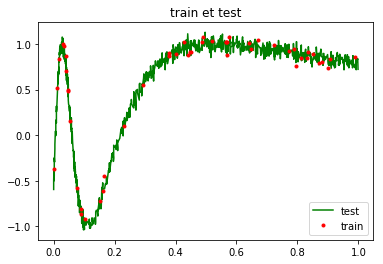

In [10]:
"""  observons les données"""

z = np.loadtxt("data/oxydo_train.csv", delimiter=",")
x_train, y_train = z[:, 0], z[:, 1]

z_test = np.loadtxt("data/oxydo_test.csv", delimiter=",")
x_test,y_test = z_test[:, 0],z_test[:, 1]

plt.plot(x_test, y_test, label="test", c="green")
plt.plot(x_train, y_train, ".", label="train", c="red")

plt.title("train et test")

plt.legend(loc=4);


In [11]:
""" fonction pour augmenter les données """
def expand_x(x,freqMax):
    """ une ligne de 1 et une ligne contenant x """
    x_exp = [np.ones_like(x),x]
    """ on rajoute les sin/cos de x """
    for i in range(1, freqMax + 1):
        x_exp.append(np.sin(2. * np.pi * i * x))
        x_exp.append(np.cos(2. * np.pi * i * x))

    """ on transpose pour avoir les descripteurs en colonnes"""
    return np.array(x_exp).T

x_train.shape (50,)
x_train_exp.shape (50, 26)


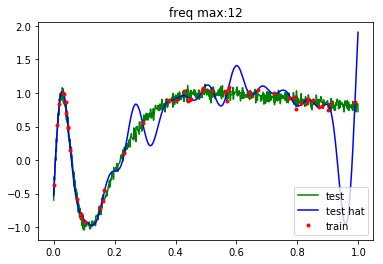

In [14]:
freqMax=12

z = np.loadtxt("data/oxydo_train.csv", delimiter=",")
x_train, y_train = z[:, 0], z[:, 1]
print("x_train.shape",x_train.shape)
x_train_exp=expand_x(x_train,freqMax)
print("x_train_exp.shape",x_train_exp.shape)

model = LinearModel()
model.fit(x_train_exp, y_train)

z_test=np.loadtxt("data/oxydo_test.csv",delimiter=",")
x_test=z_test[:,0]
y_test=z_test[:,1]
x_test_exp=expand_x(x_test,freqMax)
y_test_hat = model.predict(x_test_exp)

plt.plot(x_test,y_test,label="test",c="green")
plt.plot(x_test,y_test_hat,label="test hat",c="blue")
plt.plot(x_train,y_train,".",label="train",c="red")
plt.title("freq max:"+str(freqMax))
plt.legend(loc=4);


***A vous:*** Calculez la l'erreur quadratique associée  aux apprentissages. Il s'agit de  

        sum_i  (y[i]-y_hat[i])^2


Affichez les courbes :
freqMax ---> loosTrain = l'erreur quadratique sur les donnée de train
freqMax ---> lossTest  = l'erreur quadratique sur les donnée de test

Constatez le sur-apprentissage en superposant ces deux courbes.

AIDE : il vous faudra pour cela, créer une fonction qui contient un grosse partie du step2,
et qui aura comme argument 'freqMax'

## La balance Biais-variance

In [19]:
def extractTrainDataRandomly(trainSize,z):
    shuffleIndex = np.random.permutation(z.shape[0])
    selectedIndices=shuffleIndex[:trainSize]
    x_train = z[selectedIndices, 0]
    y_train = z[selectedIndices, 1]
    return x_train,y_train

def predictionFunction_sinCos(x_train,y_train,x_test,freqMax):
    x_train_exp=expand_x(x_train,freqMax)
    model = LinearModel()
    model.fit(x_train_exp, y_train)
    x_test_exp=expand_x(x_test,freqMax)
    return model.predict(x_test_exp)

tuning: 1
tuning: 2
tuning: 3
tuning: 4
tuning: 5
tuning: 6


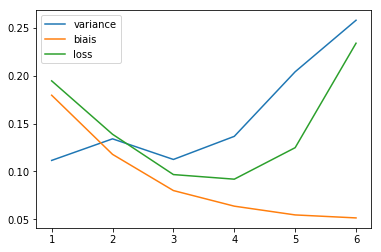

In [20]:
trainSize = 50
nbEssaies=200

z_test = np.loadtxt("data/oxydo_test.csv", delimiter=",")
x_test = z_test[:, 0]
y_test = z_test[:, 1]
test_size=len(x_test)

tunings=[1,2,3,4,5,6]
tuning_to_variances=[]
tuning_to_bias=[]
tuning_to_loss=[]

z_train = np.loadtxt("data/oxydo_big_train.csv", delimiter=",")

for tuning in tunings:
    print("tuning:",tuning)
    estimations= np.zeros([nbEssaies,test_size])
    for essaie in range(nbEssaies):
        x_train, y_train = extractTrainDataRandomly(trainSize,z_train)
        
        y_test_hat = predictionFunction_sinCos(x_train, y_train, x_test, tuning)  
        estimations[essaie,:]=y_test_hat
        
    """le premier np.mean c'est la moyenne sur les données test.
    la seconde opération s'effectue sur les différents essaies."""
    tuning_to_variances.append(np.mean(  np.std (estimations,axis=0)))
    tuning_to_bias.append     (np.mean( (np.mean(estimations,axis=0)-y_test)**2))
    tuning_to_loss.append     (np.mean( (estimations-y_test)**2   ))
    
plt.plot(tunings,tuning_to_variances,label="variance")
plt.plot(tunings,tuning_to_bias,label="biais")
plt.plot(tunings,tuning_to_loss,label="loss")

plt.legend(loc=2);


QUIZ:  plus le paramètre 'tuning' est grand et plus la flexibilité du modèle est grande/petite ?
D'après l'étude que l'on vient de faire, quel serait le meilleurs tuning ?

si votre patron veut favoriser la 'reproductibilité' (ou robustesse) de vos expériences, quel tuning choisir ?
si votre patron préfère avoir le meilleurs ajustement possible,  quel tuning choisir ?